<a href="https://colab.research.google.com/github/nanochiplab/Makine_Ogrenmesi/blob/main/Makine_%C3%96%C4%9Frenmesi_Final_FlowChartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Gerekli kütüphaneleri içe aktarıyoruz
import pandas as pd # veri yükleme, işleme, temizleme ve analiz gibi görevler için
import numpy as np #  matematiksel işlemler ve çok boyutlu dizileri kolayca yönetmek için
from sklearn.preprocessing import MinMaxScaler # sayısal özellikleri belirli bir aralığa (genellikle [0, 1]) ölçeklendirmek için

!pip install xgboost             #xgboost kütüphanesini yüklüyoruz.
#not defteri ortamının özelliklerine erişmek veya not defteri ortamını özelleştirmek için kullanılır
from IPython import get_ipython  #IPython kütüphanesinden get_ipython fonksiyonunu içe aktarır.
from IPython.display import display #IPython.display modülünden display fonksiyonunu içe aktarır

from sklearn.metrics import roc_curve, auc #roc_curve: Bu fonksiyon, Gerçek Pozitif Oranı
# (True Positive Rate - TPR) ve Yanlış Pozitif Oranı (False Positive Rate - FPR) değerlerini farklı
# olasılık eşiklerinde hesaplamak için kullanılır.auc: Bu fonksiyon, verilen noktaları kullanarak
# eğri Altındaki Alanı (Area Under the Curve - AUC) hesaplar

import matplotlib.pyplot as plt #Python'da yaygın olarak kullanılan bir grafik çizim kütüphanesi olan
# Matplotlib'in pyplot modülünü içe aktarır

from sklearn.model_selection import StratifiedKFold, GridSearchCV # Çapraz doğrulama için, farklı model hiperparametrelerini denemek ve en iyi kombinasyonu bulmak için

#SelectKBest: Bu sınıf, belirli bir skora göre en iyi 'k' özelliği seçmek için kullanılır
#mutual_info_classif: Bu fonksiyon, sınıflandırma problemleri için karşılıklı bilgiyi (Mutual Information) hesaplar
#mutual_info_regression: Bu fonksiyon, regresyon problemleri için karşılıklı bilgiyi hesaplar
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, mutual_info_regression

from sklearn.neighbors import KNeighborsClassifier # KNN sınıflandırma modeli oluşturmak için

from sklearn.svm import SVC # SVC sınıflandırma modeli oluşturmak için

from sklearn.neural_network import MLPClassifier # MLP sinir ağı sınıflandırma modeli oluşturmak için

from xgboost import XGBClassifier # XGBoost sınıflandırma modeli oluşturmak için

# Bu metrikleri kullanarak Nested Cross-Validation sürecinin her dış katmanında en iyi modelin test seti
# üzerindeki performansını değerlendirmek ve nihai sonuçları raporlamak için
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Veri işleme adımlarını (örneğin, özellik ölçeklendirme, özellik seçimi) ve bir modeli bir araya
# getirmek için Pipeline sınıfını yüklüyoruz
from sklearn.pipeline import Pipeline

import warnings # Uyarıları gizlemek için
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 11.5 MB/s eta 0:00:00


In [ ]:
# kendi dosya adımızı kullanarak 100.000 verilik bir veriseti oluşturacağız..
# BU HÜCRE SAMPLE DOSYASI YAPMAK İÇİN 1 DEFAYA MAHSUS KULLANILACAK
from google.colab import drive #Google drive'ı Colab Not defterine bağlamak için
drive.mount('/content/drive')  #import edeceğiz

#Veri Yolu ve dönüşümler
#Google Drive'ımızdaki bir dosyanın yolunu file_path adlı bir değişkene atar
file_path = "/content/drive/MyDrive/Makine Öğrenmesi/Final/HIGGS.csv"  # Her sınıf ayrı klasörde
#df = pd.read_csv('HIGGS.csv')
cf = pd.read_csv(file_path)      #Dosyayı okuyoruz...

# DataFrame'in ilk birkaç satırını görüntüleyiyoruz
print(cf.head())


# Veri setinden rastgele 100.000 örnek seçeceğiz
# replace=False, aynı satırın birden fazla kez seçilmesini engeller.
if len(cf) > 100000:  #Dosya içeriği 100.000 veriden büyükse
    df_sample = cf.sample(n=100000, random_state=42, replace=False) #Random 100.000 farklı veri seç
else:
    df_sample = cf.copy() #cf adlı DataFrame'in bir kopyasını oluşturur ve bu kopyayı df_sample adlı yeni bir değişkene atar
    print("Veri setinin boyutu 100.000'den küçük. Tamamı kullanılacaktır.") #Veri 100.000'den küçükse hepsini kullanacağız
#Ama verisetinin 100.000 örnekten fazla olduğunu biliyoruz..
# Artık işlemlerinizi df_sampled DataFrame'i üzerinde yapacağız
# Örneğin, df_sampled'in ilk 5 satırını görüntüleyelim:
print(df_sample.head())

In [ ]:
# Google Drive'a kaydetmek için dosya yolu
# SADECE SAMPLE DOSYASI OLUŞTURMAK İÇİN 1 DEFA KULLANILACAK
# 100.00 örneklik veriseti dosyası oluturacağız...
drive_file_path = '/content/drive/MyDrive/Makine Öğrenmesi/Final/HIGGS_sampled.csv' # İstediğiMiz Drive yolu

# Örneklenmiş DataFrame'i Google Drive'a CSV olarak kaydedeceğiz
df_sample.to_csv(drive_file_path, index=False) #Yukarıdaki dosya yoluna kayıt yapacağız

print(f"Örneklenmiş veri seti '{drive_file_path}' olarak Google Drive'a kaydedildi.") # Örnekleme Mesajı

In [ ]:
#IQR ve MinMaxScaler işlemleri için sadece sayısal sütunlara ihtiyacımız var.
from google.colab import drive
drive.mount('/content/drive')

drive_file_path = '/content/drive/MyDrive/Makine Öğrenmesi/Final/HIGGS_sampled.csv' # İstediğiniz Drive yolunu belirtin
df = pd.read_csv(drive_file_path) #Sample Dosyayıuyarak df değişkenine atıyoruz..
# df DataFrame'indeki tüm sayısal sütunların adlarını belirler ve bu adları bir Python listesi olarak
# numerical_cols değişkenine atar
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

Mounted at /content/drive


In [ ]:
# İşlem türünü seçimlik yaptık: 'silme' veya 'sınır'
islem_turu = 'sınır' # Aykırı değerler ile değiştireceğimiz işlem türü sınır yaptık veya 'silme' de olur

for col in numerical_cols: #numerical_cols değişkenindeki sayısal sütunların listesi üzerinde döngü.
    Q1 = df[col].quantile(0.25) #Seçilen sütunun (%25) ilk çeyrek değerini alır
    Q3 = df[col].quantile(0.75) #Seçilen sütunun (%75) üçüncü çeyrek değerini alır
    IQR = Q3 - Q1 #Çeyrekler arası aralığı (IQR) hesaplar.
    #IQR, üçüncü çeyrek ile ilk çeyrek arasındaki farktır

    alt_sinir = Q1 - 1.5 * IQR #Aykırı değerleri belirlemek için alt sınırı hesaplar.
    #Bu, ilk çeyrekten IQR'nin 1.5 katı çıkarılarak bulunur
    ust_sinir = Q3 + 1.5 * IQR #Aykırı değerleri belirlemek için üst sınırı hesaplar.
    #Bu, üçüncü çeyreğe IQR'nin 1.5 katı eklenerek bulunur

    if islem_turu == 'silme': #KOD İŞLEME BURAYA GİRMEYECEK !!!!! çünkü yukarıda SINIR olarak belirledik
        # Aykırı değerleri silme
        # col adlı sütundaki değerleri alt_sinir ve ust_sinir arasında olan satırları seçen bir boolean
        # maskesi oluşturur. Sadece bu koşulu sağlayan satırlar DataFrame'de kalır
        df = df[(df[col] >= alt_sinir) & (df[col] <= ust_sinir)].copy()
    elif islem_turu == 'sınır':
        # Aykırı değerleri sınır değerlerle değiştirme
        #col sütunundaki bir değerin alt_sinirdan küçük olup olmadığını kontrol eder.Eğer koşul doğruysa
        #o değer yerine alt_sinir konur. Eğer koşul yanlışsa değer olduğu gibi kalır.
        df[col] = np.where(df[col] < alt_sinir, alt_sinir, df[col])
        #col sütunundaki bir değerin ust_sinirdan büyük olup olmadığını kontrol eder.Eğer koşul doğruysa
        #o değer yerine ust_sinir konur. Eğer koşul yanlışsa değer olduğu gibi kalır.
        df[col] = np.where(df[col] > ust_sinir, ust_sinir, df[col])

In [ ]:
#Aykırı değer işlemlerinden sonra, sayısal değişkenleri MinMaxScaler kullanarak [0, 1] aralığına dönüştürebiliriz.
scaler = MinMaxScaler() #scikit-learn kütüphanesinden MinMaxScaler sınıfının bir örneğini oluşturur.

#Önceki adımda oluşturulan MinMaxScaler objesini kullanarak df DataFrame'indeki sayısal sütunları [0, 1]
#aralığına ölçeklendirir ve sonuçları aynı sütunlara geri atar
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# Veri setimizin ilk sütununu (indeksi 0) hedef değişken olarak belirleyeceğiz.
hedef_degiskeni = df.columns[0]
y = df[hedef_degiskeni] # hedef değişken olarak "y" atadık

# Hedef değişken sütununu veri setinden çıkararak özellik matrisini (X) oluşturuyoruz
X = df.drop(columns=[hedef_degiskeni])

print(f"Hedef değişken olarak '{hedef_degiskeni}' sütunu seçildi.") #yaptıklarımızı yazdırıyoruz..
print("X (özellikler) DataFrame'inin ilk birkaç satırı:") #yaptıklarımızı yazdırıyoruz..
print(X.head()) # Dataframe'in ilk baş kısmını yazdıracağız
print("\ny (hedef değişken) Seriesop'inin ilk birkaç değeri:") #yaptıklarımızı yazdırıyoruz..
print(y.head()) # Hedef değişkenimize ait ilk baş kısmını yazdıracağız..

Hedef değişken olarak '1.000000000000000000e+00' sütunu seçildi.
X (özellikler) DataFrame'inin ilk birkaç satırı:
   8.692932128906250000e-01  -6.350818276405334473e-01  \
0                  0.133056                     0.3842   
1                  0.034304                     0.5142   
2                  0.771121                     0.4536   
3                  0.228123                     0.3356   
4                  0.027311                     0.7866   

   2.256902605295181274e-01  3.274700641632080078e-01  \
0                  0.297030                  0.287704   
1                  0.593295                  1.000000   
2                  0.116997                  0.583006   
3                  0.142625                  0.272939   
4                  0.824106                  0.502641   

   -6.899932026863098145e-01  7.542022466659545898e-01  \
0                   0.701456                  1.000000   
1                   0.643529                  1.000000   
2                   


Processing Outer Fold 1

  Performing Grid Search for KNN in Outer Fold 1
  Best Hyperparameters for KNN: {'n_neighbors': 11}

  Outer Fold 1 Test Scores (KNN):
    AUC: 0.7151
    Accuracy: 0.6624
    Precision: 0.6618
    Recall: 0.7365
    F1 Score: 0.6972


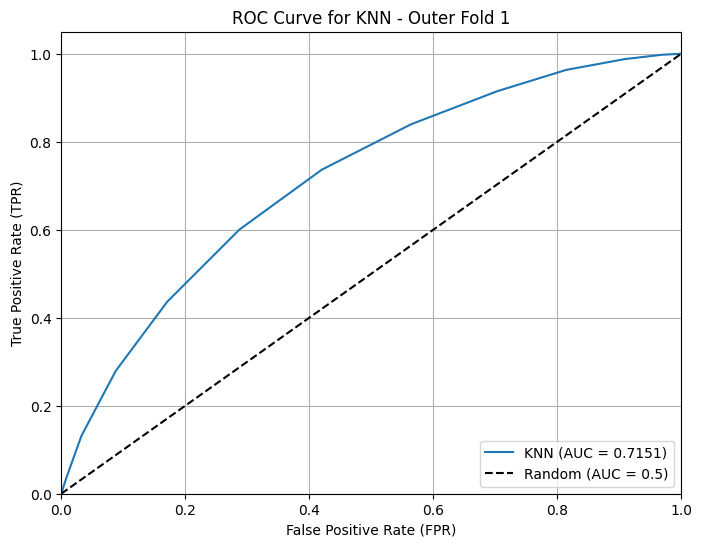


  Performing Grid Search for SVM in Outer Fold 1
  Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}

  Outer Fold 1 Test Scores (SVM):
    AUC: 0.7709
    Accuracy: 0.7029
    Precision: 0.7024
    Recall: 0.7583
    F1 Score: 0.7293


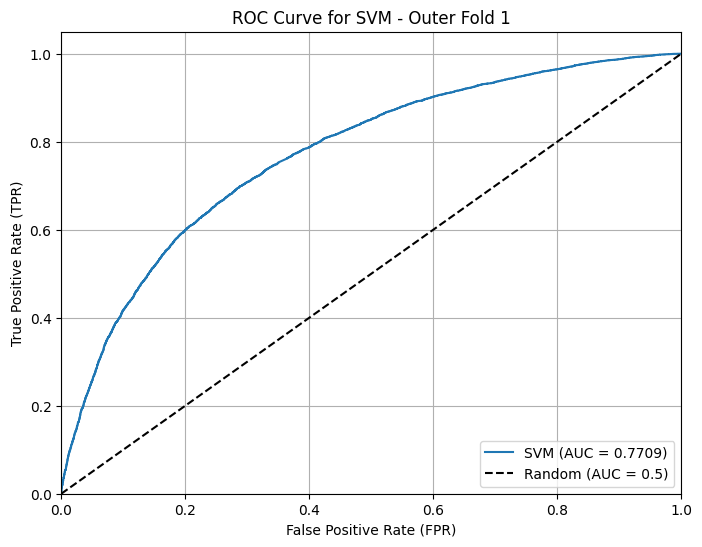


  Performing Grid Search for MLP in Outer Fold 1
  Best Hyperparameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50)}

  Outer Fold 1 Test Scores (MLP):
    AUC: 0.7940
    Accuracy: 0.7159
    Precision: 0.7465
    Recall: 0.6988
    F1 Score: 0.7219


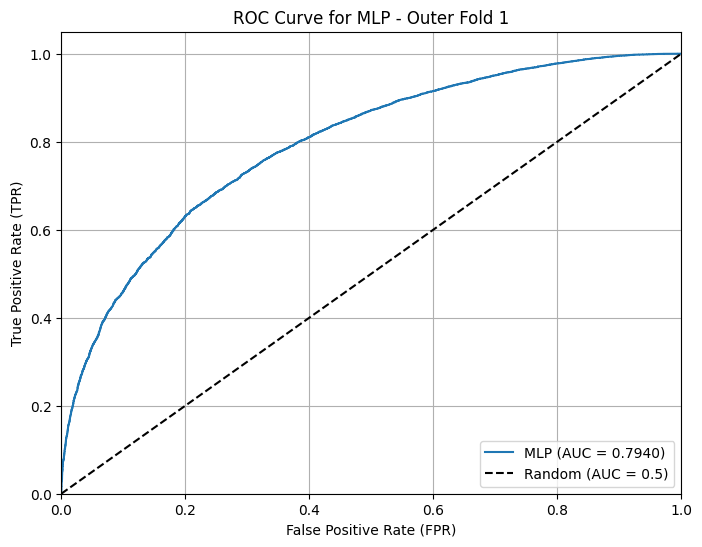


  Performing Grid Search for XGBoost in Outer Fold 1
  Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}

  Outer Fold 1 Test Scores (XGBoost):
    AUC: 0.7957
    Accuracy: 0.7187
    Precision: 0.7331
    Recall: 0.7342
    F1 Score: 0.7336


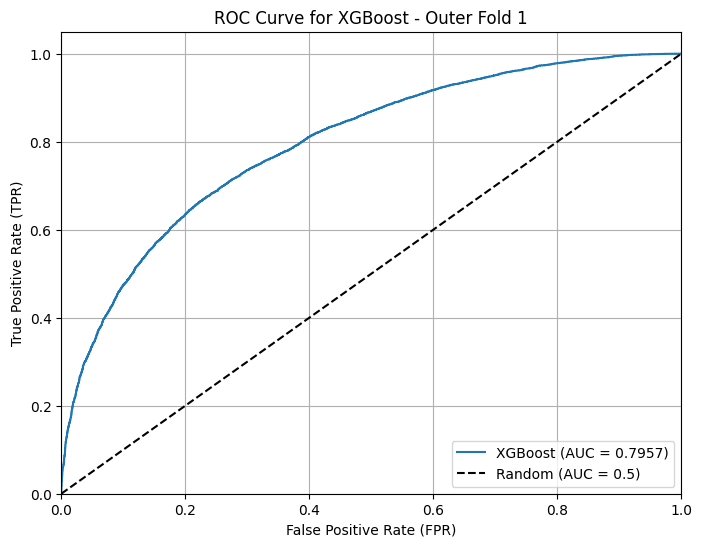


Processing Outer Fold 2

  Performing Grid Search for KNN in Outer Fold 2
  Best Hyperparameters for KNN: {'n_neighbors': 11}

  Outer Fold 2 Test Scores (KNN):
    AUC: 0.7081
    Accuracy: 0.6562
    Precision: 0.6558
    Recall: 0.7334
    F1 Score: 0.6924


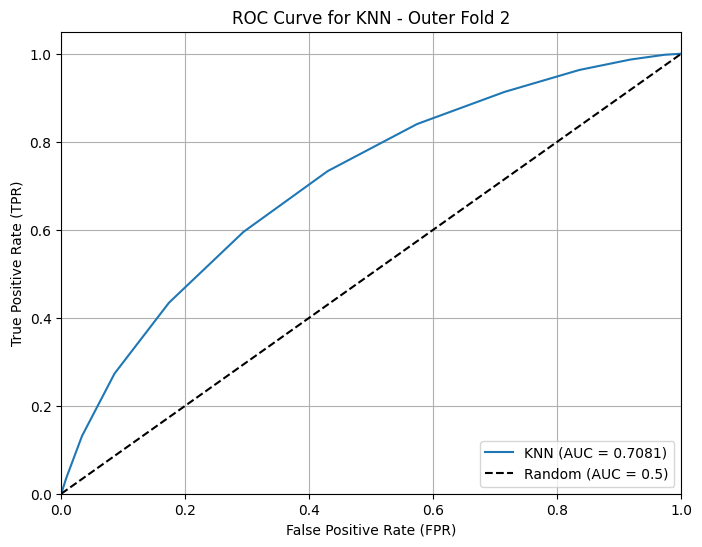


  Performing Grid Search for SVM in Outer Fold 2
  Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}

  Outer Fold 2 Test Scores (SVM):
    AUC: 0.7732
    Accuracy: 0.7054
    Precision: 0.7027
    Recall: 0.7655
    F1 Score: 0.7328


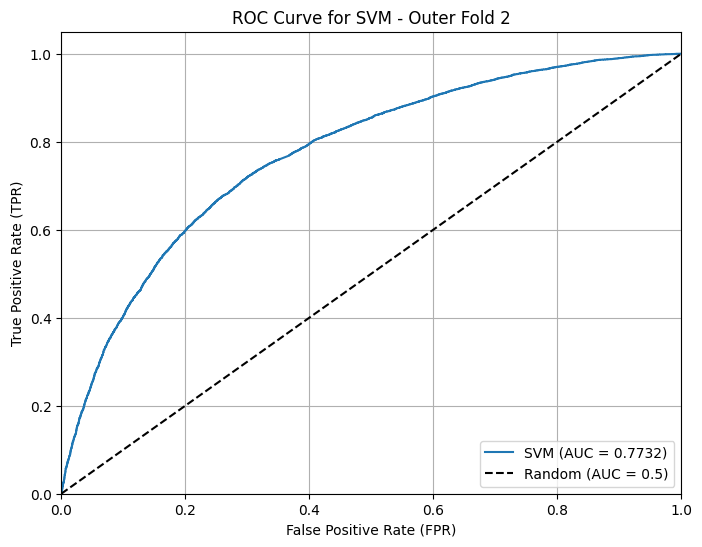


  Performing Grid Search for MLP in Outer Fold 2
  Best Hyperparameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (100,)}

  Outer Fold 2 Test Scores (MLP):
    AUC: 0.7905
    Accuracy: 0.7129
    Precision: 0.7226
    Recall: 0.7398
    F1 Score: 0.7311


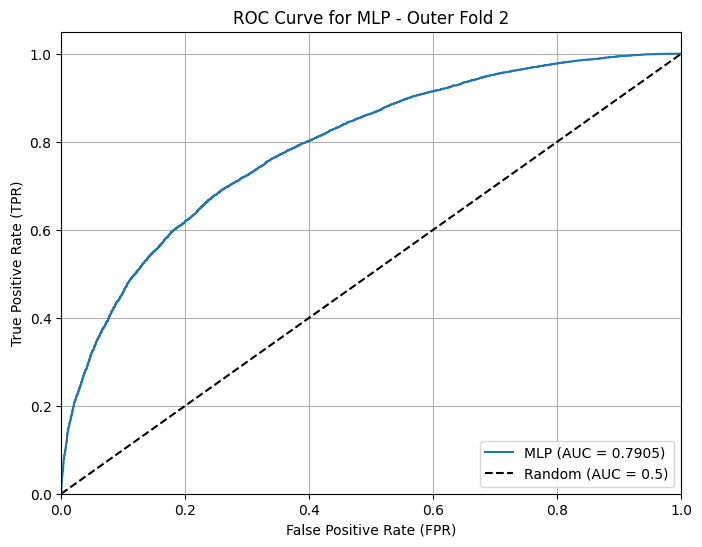


  Performing Grid Search for XGBoost in Outer Fold 2
  Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}

  Outer Fold 2 Test Scores (XGBoost):
    AUC: 0.7945
    Accuracy: 0.7151
    Precision: 0.7280
    Recall: 0.7345
    F1 Score: 0.7312


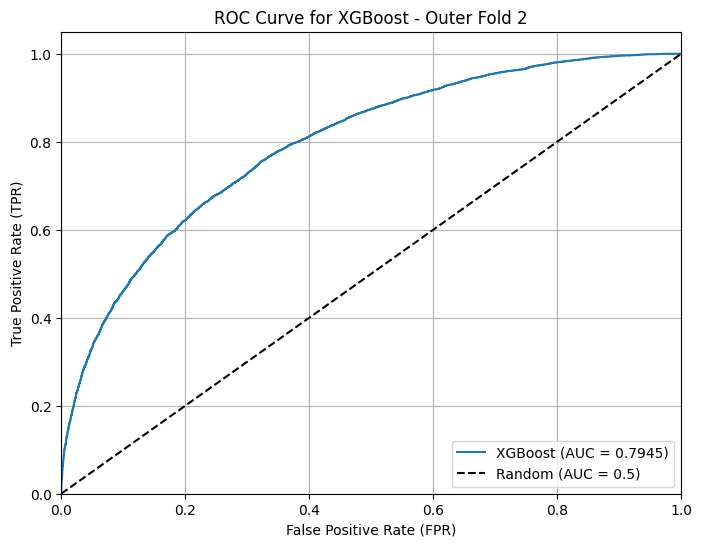


Processing Outer Fold 3

  Performing Grid Search for KNN in Outer Fold 3
  Best Hyperparameters for KNN: {'n_neighbors': 11}

  Outer Fold 3 Test Scores (KNN):
    AUC: 0.7270
    Accuracy: 0.6678
    Precision: 0.6658
    Recall: 0.7435
    F1 Score: 0.7025


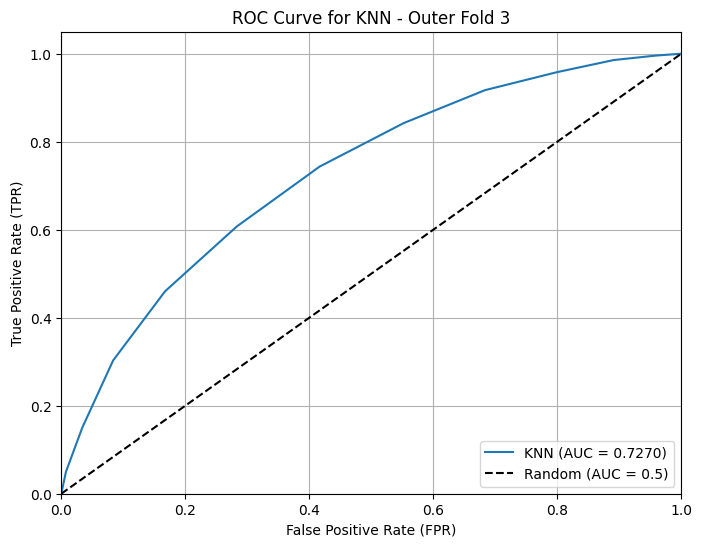


  Performing Grid Search for SVM in Outer Fold 3
  Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}

  Outer Fold 3 Test Scores (SVM):
    AUC: 0.7816
    Accuracy: 0.7146
    Precision: 0.7110
    Recall: 0.7732
    F1 Score: 0.7408


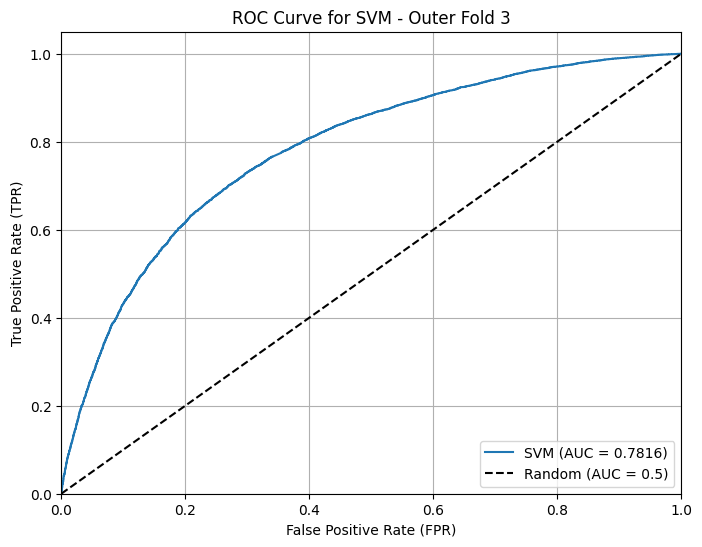


  Performing Grid Search for MLP in Outer Fold 3
  Best Hyperparameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50)}

  Outer Fold 3 Test Scores (MLP):
    AUC: 0.8055
    Accuracy: 0.7259
    Precision: 0.7286
    Recall: 0.7655
    F1 Score: 0.7466


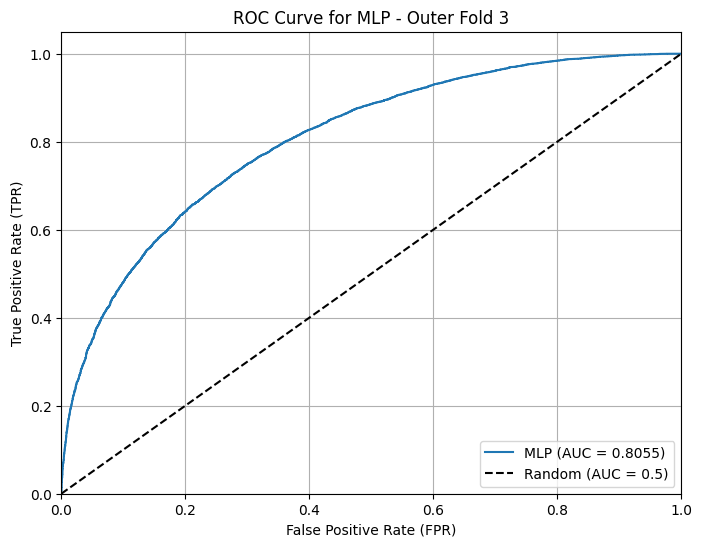


  Performing Grid Search for XGBoost in Outer Fold 3
  Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 200}

  Outer Fold 3 Test Scores (XGBoost):
    AUC: 0.8074
    Accuracy: 0.7304
    Precision: 0.7380
    Recall: 0.7580
    F1 Score: 0.7479


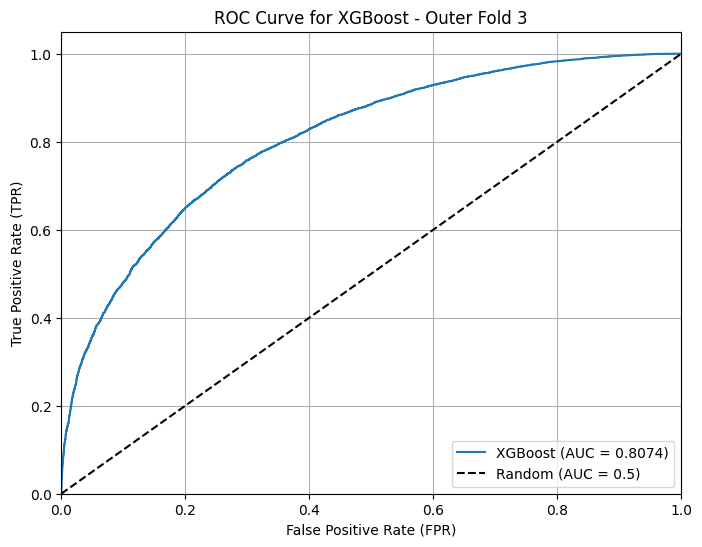


Processing Outer Fold 4

  Performing Grid Search for KNN in Outer Fold 4
  Best Hyperparameters for KNN: {'n_neighbors': 11}

  Outer Fold 4 Test Scores (KNN):
    AUC: 0.7245
    Accuracy: 0.6675
    Precision: 0.6687
    Recall: 0.7328
    F1 Score: 0.6993


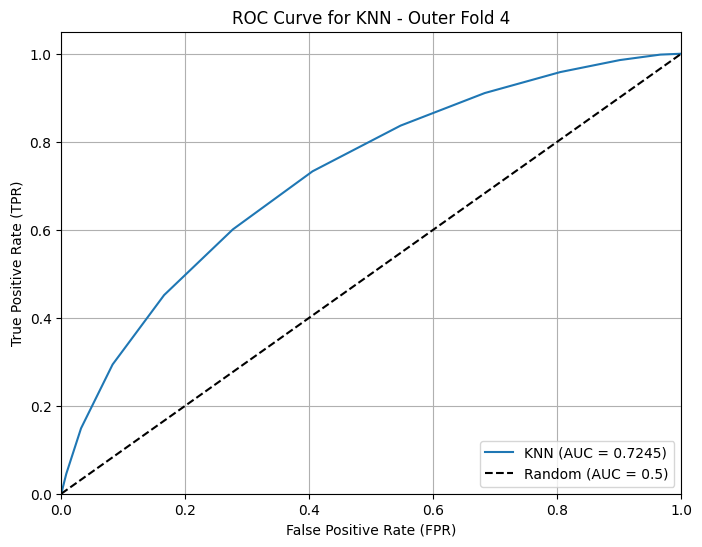


  Performing Grid Search for SVM in Outer Fold 4
  Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}

  Outer Fold 4 Test Scores (SVM):
    AUC: 0.7749
    Accuracy: 0.7067
    Precision: 0.7063
    Recall: 0.7601
    F1 Score: 0.7322


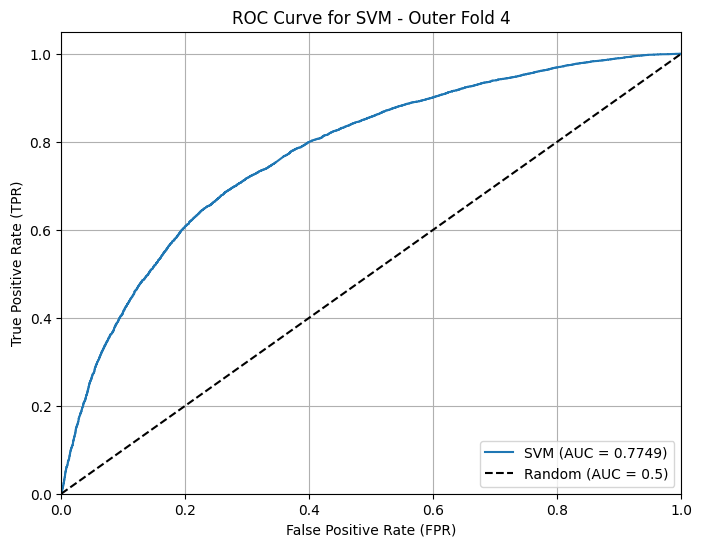


  Performing Grid Search for MLP in Outer Fold 4
  Best Hyperparameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50)}

  Outer Fold 4 Test Scores (MLP):
    AUC: 0.7969
    Accuracy: 0.7193
    Precision: 0.7438
    Recall: 0.7139
    F1 Score: 0.7285


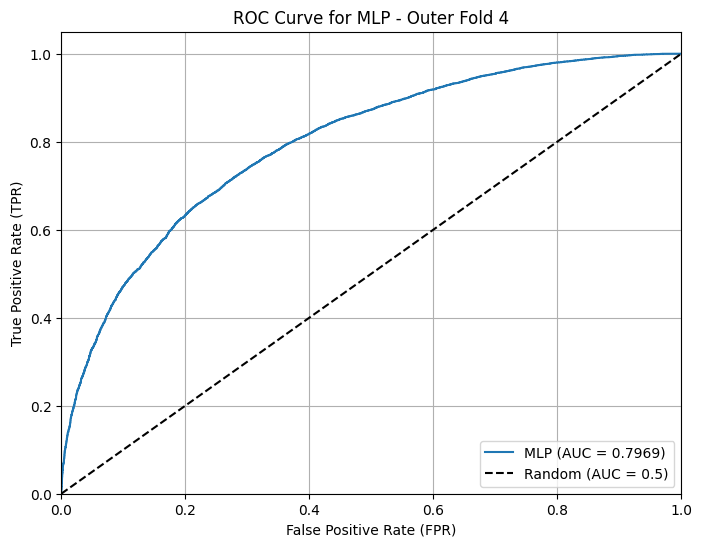


  Performing Grid Search for XGBoost in Outer Fold 4
  Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}

  Outer Fold 4 Test Scores (XGBoost):
    AUC: 0.7980
    Accuracy: 0.7229
    Precision: 0.7374
    Recall: 0.7376
    F1 Score: 0.7375


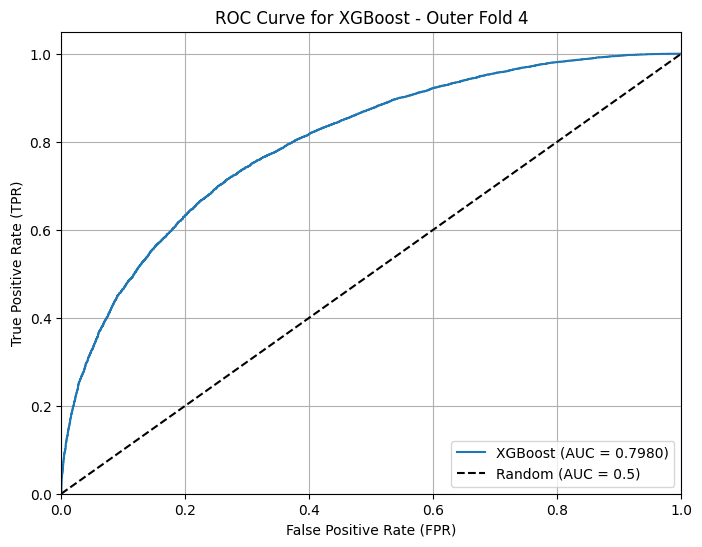


Processing Outer Fold 5

  Performing Grid Search for KNN in Outer Fold 5
  Best Hyperparameters for KNN: {'n_neighbors': 11}

  Outer Fold 5 Test Scores (KNN):
    AUC: 0.7051
    Accuracy: 0.6529
    Precision: 0.6505
    Recall: 0.7390
    F1 Score: 0.6919


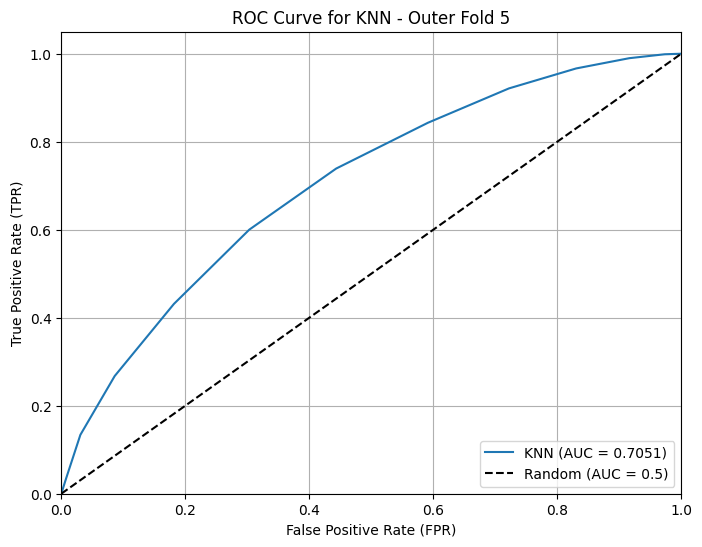


  Performing Grid Search for SVM in Outer Fold 5
  Best Hyperparameters for SVM: {'C': 10, 'kernel': 'rbf'}

  Outer Fold 5 Test Scores (SVM):
    AUC: 0.7694
    Accuracy: 0.7024
    Precision: 0.7001
    Recall: 0.7624
    F1 Score: 0.7299


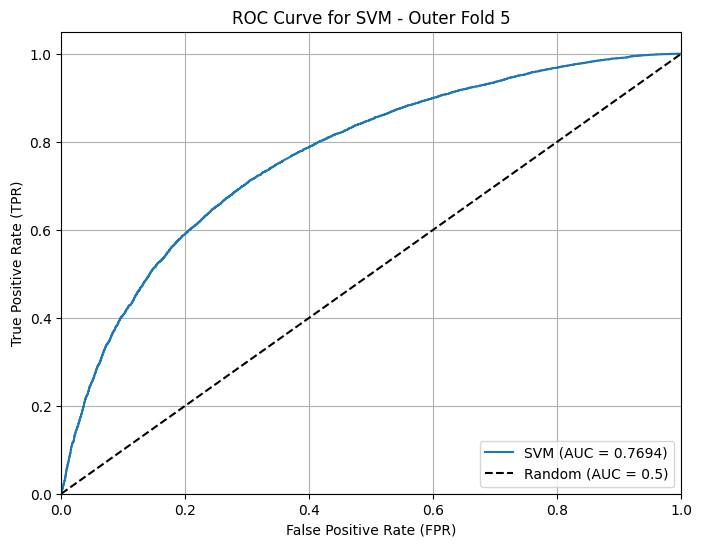


  Performing Grid Search for MLP in Outer Fold 5
  Best Hyperparameters for MLP: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50)}

  Outer Fold 5 Test Scores (MLP):
    AUC: 0.7860
    Accuracy: 0.7096
    Precision: 0.7354
    Recall: 0.7021
    F1 Score: 0.7184


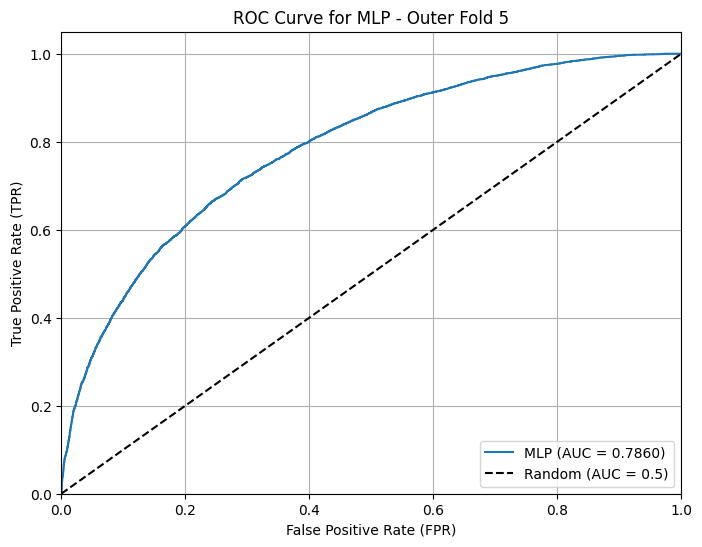


  Performing Grid Search for XGBoost in Outer Fold 5
  Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}

  Outer Fold 5 Test Scores (XGBoost):
    AUC: 0.7931
    Accuracy: 0.7163
    Precision: 0.7296
    Recall: 0.7343
    F1 Score: 0.7319


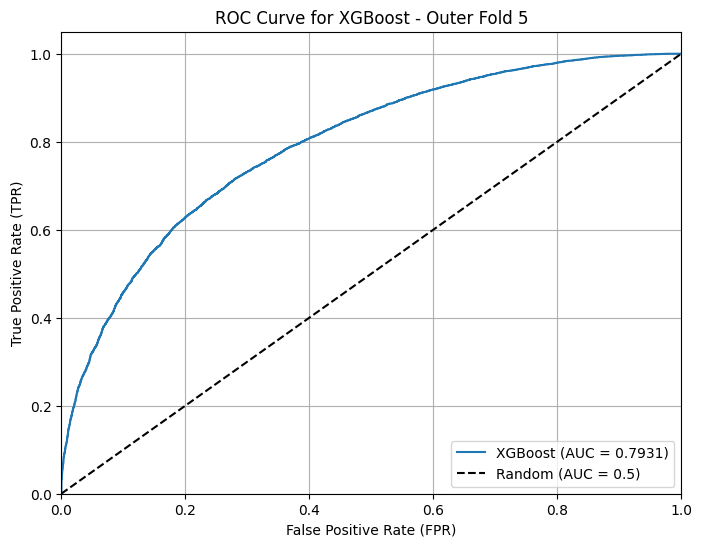


Nested Cross-Validation Results (Mean +/- Std Dev)

--- KNN ---
AUC: 0.7160 +/- 0.0086
Accuracy: 0.6614 +/- 0.0060
Precision: 0.6605 +/- 0.0066
Recall: 0.7371 +/- 0.0039
F1 Score: 0.6967 +/- 0.0040

--- SVM ---
AUC: 0.7740 +/- 0.0042
Accuracy: 0.7064 +/- 0.0044
Precision: 0.7045 +/- 0.0038
Recall: 0.7639 +/- 0.0052
F1 Score: 0.7330 +/- 0.0041

--- MLP ---
AUC: 0.7946 +/- 0.0066
Accuracy: 0.7167 +/- 0.0056
Precision: 0.7354 +/- 0.0090
Recall: 0.7240 +/- 0.0253
F1 Score: 0.7293 +/- 0.0098

--- XGBoost ---
AUC: 0.7977 +/- 0.0051
Accuracy: 0.7207 +/- 0.0055
Precision: 0.7332 +/- 0.0040
Recall: 0.7397 +/- 0.0092
F1 Score: 0.7364 +/- 0.0061

Aggregated ROC Curves and AUC Scores


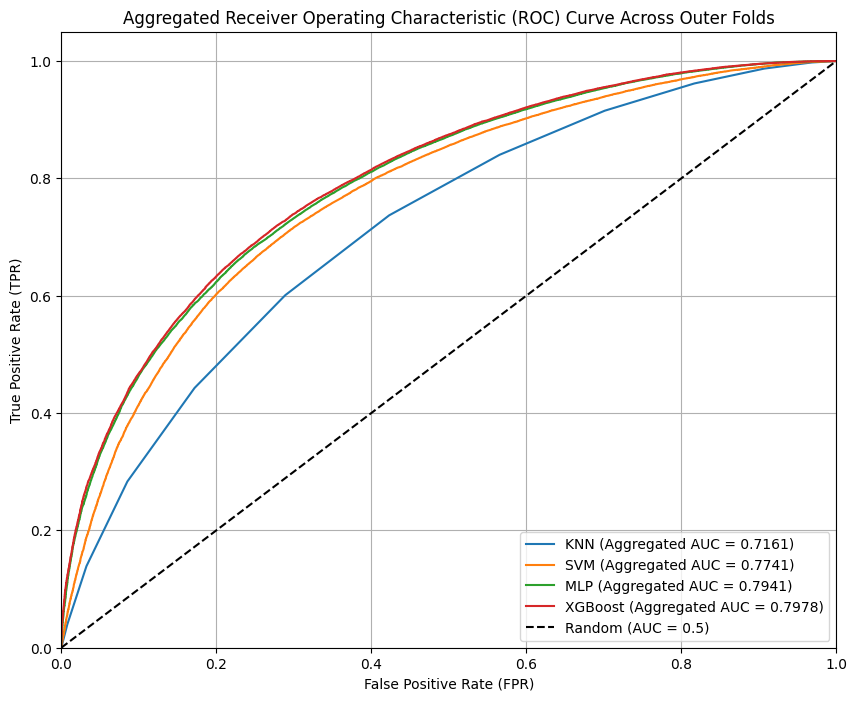


Aggregated ROC Eğrileri ve AUC Skorları görselleştirildi.

Aggregated AUC Skorlarının Yorumlanması:
- KNN: Birleştirilmiş AUC skoru 0.7161
  -> İyi sınıflandırıcı.
- SVM: Birleştirilmiş AUC skoru 0.7741
  -> İyi sınıflandırıcı.
- MLP: Birleştirilmiş AUC skoru 0.7941
  -> İyi sınıflandırıcı.
- XGBoost: Birleştirilmiş AUC skoru 0.7978
  -> İyi sınıflandırıcı.


In [ ]:

# Nested Cross-Validation ayarları
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #iç içe geçmiş çapraz doğrulama
# işleminin dış döngüsünü kurmak için kullanacağız. Dış döngü, verileri 5 kez eğitim ve test setlerine
# böler ve her bölünme için model eğitilir ve değerlendirilir

inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # GridSearchCV içinde kullanacağız.
# Dış döngünün her bir iterasyonunda kullanılan eğitim verisini daha fazla bölmek için kullanılır.
# Bu iç döngü genellikle hiperparametre ayarı veya özellik seçimi gibi görevler için bir doğrulama seti
# sağlamak amacıyla kullanılır.

# Hiperparametre arama alanları (Grid Search için)
# Hiperparametre arama alanlarını çaprazlama deneyecek şekilde yaptık.
param_grid = {
    'KNN': {'n_neighbors': [3, 5, 7, 9, 11]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'activation': ['relu', 'tanh']},
    'XGBoost': {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200]}
}

# Her model için dış test skorlarını saklamak için sözlük kuruyoruz...
outer_test_scores = {
    'KNN': {'auc': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}, # KNN dış test skorları
    'SVM': {'auc': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}, # SVM dış test skorları
    'MLP': {'auc': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []}, # MLP dış test skorları
    'XGBoost': {'auc': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1': []} # XGBoost dış test skorları
}

# Her model için tüm dış test katmanlarının gerçek etiketlerini ve tahmin olasılıklarını saklamak için sözlükler
# Döngü tamamlandıktan sonra, bu all_outer_y_true sözlüğü, her model için tüm dış test katmanlarından
# birleştirilmiş gerçek etiketleri içerecektir. Bu birleştirilmiş etiketler, daha sonra tüm dış katmanlar
# üzerinden toplu bir ROC eğrisi çizmek gibi işlemler için kullanılacaktır. Toplu ROC eğrisi, modelin
# genel performansını daha sağlam bir şekilde değerlendirmeye yardımcı olur.
all_outer_y_true = {
    'KNN': [],
    'SVM': [],
    'MLP': [],
    'XGBoost': []
}

# Döngü tamamlandıktan sonra, bu all_outer_y_proba sözlüğü, her model için tüm dış test katmanlarından
# birleştirilmiş tahmin olasılıklarını içerecektir. Bu birleştirilmiş olasılıklar, all_outer_y_true
# sözlüğündeki birleştirilmiş gerçek etiketlerle birlikte kullanılarak, tüm dış katmanlar üzerinden toplu
# ROC eğrileri çizmek ve toplu AUC skorları hesaplamak için kullanılır.
all_outer_y_proba = {
    'KNN': [],
    'SVM': [],
    'MLP': [],
    'XGBoost': []
}

# Outer Loop
for fold_idx, (outer_train_index, outer_test_index) in enumerate(outer_cv.split(X, y)): # 5 kez çalışarak verisetini farklı bir eğitim ve test setine bölecek
    X_outer_train, X_outer_test = X.iloc[outer_train_index], X.iloc[outer_test_index] # Ana veriseti kullanılarak Dış döngü için eğitim ve test verisetlerini oluşturacağız
    y_outer_train, y_outer_test = y.iloc[outer_train_index], y.iloc[outer_test_index] # Ana hedef değişken veri setinden dış eğitim ve test veriseti oluşturacağız

    print(f"\nProcessing Outer Fold {fold_idx + 1}") # Bilgi mesajı

    # === Dış Döngüde Özellik Seçimi ===
    # Özellik seçiciyi dış eğitim verisi üzerinde eğiteceğiz
    selector = SelectKBest(score_func=mutual_info_classif, k=15) # 15 özellik seçimi ve mutual_info sınıflandırma
    #Mutual_info, bir özelliğin ve hedef değişkenin ne kadar bilgi paylaştığını ölçer.
    # Yüksek karşılıklı bilgiye sahip özellikler, hedef değişkeni tahmin etmek için daha alakalı kabul edilir

    selector.fit(X_outer_train, y_outer_train) #Tanımladığımız selector,mevcut dış eğitim verisi
    # (X_outer_train, y_outer_train) üzerinde eğitilir. Mutual_info_classif skorlama fonksiyonunu
    # kullanılarak X_outer_train'deki tüm özelliklerin, hedef değişken (y_outer_train) ile ilişkisi
    # hesaplandı ve en yüksek skora sahip 15 özelliğin hangileri olduğu öğrenildi.

    # Hem dış eğitim hem de dış test verisini seçilen özelliklere göre dönüştüreceğiz
    X_outer_train_selected = selector.transform(X_outer_train) #fit metodu sırasında belirlenen en iyi
    # özellikleri içeren yeni bir veri seti döndürüyoruz...

    X_outer_test_selected = selector.transform(X_outer_test) # 15 özellikli yeni validasyon verisetini
    # elde ediyoruz. Fit yapılmadı..Veri sızıntısı olmasın diye(data leakage)

    # === Her model için İç Döngüde Hiperparametre Ayarlaması (Grid Search) ===
    for model_name, param_grid_model in param_grid.items(): # dış çapraz doğrulama katmanının her bir
    # eğitim setini alıp, tanımlanmış olan her bir model için hiperparametre ayarlaması (Grid Search)
    # yapacağız. Yani, dış döngünün her adımında, bu iç döngü sayesinde sırasıyla KNN, SVM, MLP ve XGBoost
    # modelleri için Grid Search çalıştırılacaktır.

        print(f"\n  Performing Grid Search for {model_name} in Outer Fold {fold_idx + 1}") # Bilgi mesajı

        # Modeli oluştur (henüz sabitlenmiş hiperparametrelerle değil, Grid Search için)
        if model_name == 'KNN':
            model = KNeighborsClassifier() # parametreler alınarak model oluşturuluyor
        elif model_name == 'SVM':
            model = SVC(probability=True, random_state=42) # parametreler alınarak model oluşturuluyor
        elif model_name == 'MLP':
            model = MLPClassifier(max_iter=2000, random_state=42) # parametreler alınarak model oluşturuluyor
        elif model_name == 'XGBoost':
            model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42) # parametreler alınarak model oluşturuluyor

        # GridSearchCV kurulumu
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_model,
                                   scoring='roc_auc', cv=inner_cv, n_jobs=-1) # belirlenen model
        # (estimator) için, denenecek hiperparametre değerlerinin listesini (param_grid_model)
        # kullanarak, iç çapraz doğrulama (cv=inner_cv) ile ve ROC AUC skorunu (scoring='roc_auc')
        # optimize ederek en iyi hiperparametre kombinasyonunu bulmak için bir GridSearchCV nesnesi hazırlar. Bu nesne, bir sonraki satırda .fit() metodu ile çalıştırılacaktır.

        # Grid Search'i dönüştürülmüş dış eğitim verisi üzerinde çalıştıracağız
        grid_search.fit(X_outer_train_selected, y_outer_train) # .fit() metodu tamamlandığında,
        # grid_search nesnesi artık en iyi hiperparametreleri (grid_search.best_params_) ve bu en iyi
        # hiperparametrelerle tüm dış eğitim verisi üzerinde eğitilmiş en iyi modeli
        # (grid_search.best_estimator_) içerir. Bu bilgiler daha sonra dış test seti üzerinde modelin
        # performansını değerlendirmek için kullanılacaktır

        # En iyi hiperparametreleri alın
        best_params = grid_search.best_params_                           # En iyi parametreleri alıyoruz..
        print(f"  Best Hyperparameters for {model_name}: {best_params}") # Yazdırıyoruz

        best_model = grid_search.best_estimator_ # En iyi modeli alıyoruz. Bu model, Grid Search sırasında
        # en iyi performansı veren modeldir ve tüm dış eğitim verisi üzerinde eğitilmiştir.

        # === Dış Test Seti Üzerinde Değerlendirme ===
        # En iyi modeli kullanarak dış test setinde tahmin yapın
        y_outer_pred_proba = best_model.predict_proba(X_outer_test_selected)[:, 1] #best_model'in
        # X_outer_test_selected veri setindeki her bir örnek için hem 0 sınıfına hem de 1 sınıfına ait
        # olma olasılıklarını tahmin eder ve iki sütunlu bir dizi döndürür. [:, 1] kısmı ise bu diziden
        # sadece pozitif sınıfa (1) ait olma olasılıklarını içeren ikinci sütunu alır.

        y_outer_pred = best_model.predict(X_outer_test_selected) # best_model'in X_outer_test_selected
        # veri setindeki her bir örnek için nihai sınıf tahminini (0 veya 1) yapar.

        outer_test_auc = roc_auc_score(y_outer_test, y_outer_pred_proba) # y_outer_test'teki gerçek
        # etiketleri ve y_outer_pred_proba'daki tahmin edilen pozitif sınıf olasılıklarını alır.
        # Bu iki seti kullanarak ROC eğrisini çizer (farklı eşik değerleri için Yanlış Pozitif Oranı (FPR)
        # ve Gerçek Pozitif Oranı (TPR) değerlerini hesaplayarak) ve ardından bu eğrinin altında kalan
        # alanı (AUC) hesaplar

        outer_test_accuracy = accuracy_score(y_outer_test, y_outer_pred) # y_outer_test'teki gerçek
        # etiketleri ve y_outer_pred'deki tahmin edilen sınıf etiketlerini karşılaştırır. Ardından,
        # doğru tahminlerin sayısını toplam tahmin sayısına bölerek doğruluğu hesaplar

        outer_test_precision = precision_score(y_outer_test, y_outer_pred) # y_outer_test'teki gerçek
        # etiketler ile y_outer_pred'deki tahmin edilen etiketleri karşılaştırır. Bu karşılaştırmaya
        # dayanarak, modelin yaptığı tahminlerdeki Gerçek Pozitifleri ve Yanlış Pozitifleri sayar ve
        # Hassasiyet(precision) skorunu hesaplar.

        outer_test_recall = recall_score(y_outer_test, y_outer_pred) # y_outer_test'teki gerçek
        # etiketler ile y_outer_pred'deki tahmin edilen etiketleri karşılaştırır. Bu karşılaştırmaya
        # dayanarak, modelin yaptığı tahminlerdeki Gerçek Pozitifleri ve Yanlış Negatifleri sayar ve
        # Recall skorunu hesaplar.

        outer_test_f1 = f1_score(y_outer_test, y_outer_pred) # y_outer_test'teki gerçek etiketler
        # ile y_outer_pred'deki tahmin edilen etiketleri kullanarak Gerçek Pozitifler, Yanlış Pozitifler
        # ve Yanlış Negatifleri belirler ve ardından F1 skorunu hesaplar.

        # Dış test skorlarını kaydedeceğiz
        outer_test_scores[model_name]['auc'].append(outer_test_auc) # mevcut dış çapraz doğrulama
        # katmanında her model için hesaplanan ROC AUC skoru (outer_test_auc), o modelin
        # outer_test_scores sözlüğündeki 'auc' listesine eklenir. Dış döngü 5 kez çalıştığı için,
        # her modelin 'auc' listesi sonunda 5 eleman içerecektir.

        outer_test_scores[model_name]['accuracy'].append(outer_test_accuracy) # Yukarıdaki satıra benzer
        # şekilde accuracy skoru sözlükteki accuracy listesine eklenir.

        outer_test_scores[model_name]['precision'].append(outer_test_precision) # Yukarıdaki satıra benzer
        # şekilde precision skoru sözlükteki precision listesine eklenir.

        outer_test_scores[model_name]['recall'].append(outer_test_recall) # # Yukarıdaki satıra benzer
        # şekilde recall skoru sözlükteki recall listesine eklenir.

        outer_test_scores[model_name]['f1'].append(outer_test_f1) # # Yukarıdaki satıra benzer
        # şekilde f1 skoru sözlükteki f1 listesine eklenir.

        # Her dış katmanın gerçek etiketlerini ve tahmin olasılıklarını saklayacağız
        all_outer_y_true[model_name].extend(y_outer_test.values) # dış çapraz doğrulama katmanının dış
        # test setinin gerçek etiketlerini içeren NumPy dizisi (y_outer_test.values), modelin
        # all_outer_y_true sözlüğündeki ilgili listesine eklenir.

        all_outer_y_proba[model_name].extend(y_outer_pred_proba) # dış test setindeki örnekler için
        # modelin tahmin ettiği pozitif sınıf olasılıklarını içeren NumPy dizisi (y_outer_pred_proba),
        # modelin all_outer_y_proba sözlüğündeki ilgili listesine eklenir.

        # Dış Test setine ait bilgi mesajlarını yazdıracağız..
        print(f"\n  Outer Fold {fold_idx + 1} Test Scores ({model_name}):")
        print(f"    AUC: {outer_test_auc:.4f}") # dış test setinde elde ettiğimiz ROC AUC skoru
        print(f"    Accuracy: {outer_test_accuracy:.4f}")
        print(f"    Precision: {outer_test_precision:.4f}")
        print(f"    Recall: {outer_test_recall:.4f}")
        print(f"    F1 Score: {outer_test_f1:.4f}")

        # === Her Dış Döngü Sonu ROC Çizimi (Bu Katman İçin) ===
        plt.figure(figsize=(8, 6)) # 8' x 6' boyutunda çizim
        fpr, tpr, thresholds = roc_curve(y_outer_test, y_outer_pred_proba) # dış test setinin gerçek
        # etiketleri (y_outer_test) ve modelin tahmin ettiği pozitif sınıf olasılıklarını
        # (y_outer_pred_proba) kullanarak farklı sınıflandırma eşiklerinde Yanlış Pozitif Oranlarını (fpr)
        # ve Gerçek Pozitif Oranlarını (tpr) hesaplar. Bu değerler, fpr ve tpr değişkenlerine atanır.
        # Fonksiyon ayrıca bu hesaplamaların yapıldığı eşik değerlerini de thresholds değişkenine döndürür

        roc_auc = auc(fpr, tpr) # fpr dizisindeki değerleri (x koordinatları) ve tpr dizisindeki değerleri
        # (y koordinatları) alır. Bu noktalar, ROC eğrisini tanımlar. Fonksiyon, bu noktalar arasındaki
        # alanı hesaplayarak ROC eğrisinin altındaki toplam alanı (AUC) bulur

        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})') # model için hesaplanan fpr ve tpr
        # noktalarını kullanarak ROC eğrisinin grafiğini çizer

        plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)') # Bu çizgi, modelimizin performansını
        # karşılaştırmak için bir temel oluşturur. Rastgele bir sınıflandırıcının
        # (yani, tamamen şansa bağlı olarak sınıflandırma yapan bir modelin) ROC eğrisi tam olarak bu düz
        # çizgidir. Bu çizginin altındaki alan (AUC), matematiksel olarak 0.5'tir. Modelimizin ROC eğrisinin
        # bu rastgele çizginin üzerinde olması, modelimizin rastgele tahminden daha iyi bir performans
        # gösterdiği anlamına gelir. Eğri bu çizginin ne kadar üzerindeyse, modelinizin performansı o kadar
        # iyidir. Eğer modelinizin ROC eğrisi bu çizginin altında kalırsa, modelimiz rastgele tahminden
        # bile daha kötü performans gösteriyor demektir (bu durumda, modelin tahminlerini tersine çevirerek
        # daha iyi bir performans elde edebiliriz).

        plt.xlim([0.0, 1.0]) # grafiğin x ekseninin minimum ve maksimum sınırlarını ayarlıyoruz
        plt.ylim([0.0, 1.05]) # grafiğin y ekseninin minimum ve maksimum sınırlarını ayarlıyoruz

        plt.xlabel('False Positive Rate (FPR)') # x ekseninin başlığı
        plt.ylabel('True Positive Rate (TPR)') # y ekseninin başlığı

        plt.title(f'ROC Curve for {model_name} - Outer Fold {fold_idx + 1}') # başlık

        plt.legend(loc="lower right") # Grafik üzerinde bir açıklama kutusu gösterir.
        # Bu kutunun içinde, plt.plot() fonksiyonları kullanılırken label parametresi ile belirtilen
        # etiketler listelenir. Her etiketin yanında, o etikete karşılık gelen çizginin rengini ve
        # stilini gösteren küçük bir çizgi parçası bulunur.

        plt.grid(True) # grafik üzerinde yatay ve dikey kılavuz çizgileri çizer(ızgara)
        plt.show()     # Grafiği gösteriyoruz..


# --- Dış Döngü Tamamlandıktan Sonra Raporlama ---

# Nested Cross-Validation sonuçlarını raporla (dış test skorlarının ortalaması ve standart sapması)
print("\n======================================")
print("Nested Cross-Validation Results (Mean +/- Std Dev)")
print("======================================")

for model_name, scores in outer_test_scores.items(): # Her iterasyonda, o modelin adı model_name ve
# o modele ait tüm dış test skorlarını içeren iç sözlük, scores değişkenine atanır.
    print(f"\n--- {model_name} ---")
    if scores['auc']:                     # Skor listesi boş değilse devam et
        mean_auc = np.mean(scores['auc']) # AUC skorlarının ortalamasını hesaplar
        std_auc = np.std(scores['auc'])
        print(f"AUC: {mean_auc:.4f} +/- {std_auc:.4f}")

        mean_accuracy = np.mean(scores['accuracy']) # Accuracy skorlarının ortalamasını hesaplar
        std_accuracy = np.std(scores['accuracy'])   # AUC skorlarının standart sapmasını hesaplar
        print(f"Accuracy: {mean_accuracy:.4f} +/- {std_accuracy:.4f}") # yazdırıyoruz

        mean_precision = np.mean(scores['precision']) # Precision skorlarının ortalamasını hesaplar
        std_precision = np.std(scores['precision'])   # Precision skorlarının standart sapmasını hesaplar
        print(f"Precision: {mean_precision:.4f} +/- {std_precision:.4f}") # yazdırıyoruz

        mean_recall = np.mean(scores['recall']) # Recall skorlarının ortalamasını hesaplar
        std_recall = np.std(scores['recall'])   # Recall skorlarının standart sapmasını hesaplar
        print(f"Recall: {mean_recall:.4f} +/- {std_recall:.4f}") # yazdırıyoruz

        mean_f1 = np.mean(scores['f1'])  # F1 skorlarının ortalamasını hesaplar
        std_f1 = np.std(scores['f1'])    # F1 skorlarının standart sapmasını hesaplar
        print(f"F1 Score: {mean_f1:.4f} +/- {std_f1:.4f}") # yazdırıyoruz
    else:
        print("Bu model için kaydedilmiş test skoru bulunamadı.")

# Şimdi ROC eğrilerini tüm dış test katmanlarının tahminlerini birleştirerek çizelim
print("\n======================================")
print("Aggregated ROC Curves and AUC Scores")
print("======================================")

plt.figure(figsize=(10, 8)) # 10 x 8 grafik çizimi

for model_name in all_outer_y_true.keys():
    # Tüm dış katmanlardan birleştirilmiş etiketleri ve olasılıkları alın
    y_true_agg = np.array(all_outer_y_true[model_name]) # döngünün o anki iterasyonunda işlenen model için, tüm dış test
    # katmanlarından toplanmış gerçek etiketleri içeren Python listesini bir NumPy dizisine dönüştürür

    y_proba_agg = np.array(all_outer_y_proba[model_name]) # tüm dış test katmanlarından toplanmış tahmin olasılıklarını
    # içeren Python listesini bir NumPy dizisine dönüştürür

    # ROC eğrisini hesapla
    fpr_agg, tpr_agg, thresholds_agg = roc_curve(y_true_agg, y_proba_agg) # tüm dış test setlerinin gerçek
    # etiketlerini (y_true_agg) ve bunlara karşılık gelen birleştirilmiş tahmin olasılıklarını
    # (y_proba_agg) kullanarak toplu ROC eğrisi için gerekli FPR ve TPR değerlerini hesaplar

    roc_auc_agg = auc(fpr_agg, tpr_agg) # Toplu eğrinin altındaki toplam alanı (Aggregated AUC) hesaplar.

    # ROC eğrisini çiz
    plt.plot(fpr_agg, tpr_agg, label=f'{model_name} (Aggregated AUC = {roc_auc_agg:.4f})')

# Rastgele sınıflandırıcı için (AUC = 0.5) referans çizgisi
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

# Grafik ayarları
plt.xlim([0.0, 1.0]) # grafiğin x ekseninin minimum ve maksimum sınırlarını ayarlıyoruz
plt.ylim([0.0, 1.05]) # grafiğin y ekseninin minimum ve maksimum sınırlarını ayarlıyoruz

plt.xlabel('False Positive Rate (FPR)') # x ekseninin başlığı
plt.ylabel('True Positive Rate (TPR)') # y ekseninin başlığı

plt.title('Aggregated Receiver Operating Characteristic (ROC) Curve Across Outer Folds') # Başlık ataması
plt.legend(loc="lower right") #Grafikte label parametresi ile tanımlanmış tüm çizgileri
# (bu durumda ROC eğrisi ve rastgele çizgi) bulur.Bu çizgilerin renk ve stil örneklerini gösteren küçük
# simgeler oluşturur.ROC eğrisinde sağ altta görülmektedir.

plt.grid(True) # grafik üzerinde yatay ve dikey kılavuz çizgileri çizer(ızgara)
plt.show()     # Grafiği gösteriyoruz..

print("\nAggregated ROC Eğrileri ve AUC Skorları görselleştirildi.") # Bilgi Mesajı

# AUC Skorlarının Yorumlanması:
print("\nAggregated AUC Skorlarının Yorumlanması:") # Bilgi Mesajı

for model_name in all_outer_y_true.keys():                # Model isimleri teker teker alacağız
    y_true_agg = np.array(all_outer_y_true[model_name])   # döngünün o anki iterasyonunda işlenen model için, tüm dış test
    # katmanlarından toplanmış gerçek etiketleri içeren Python listesini bir NumPy dizisine dönüştürür

    y_proba_agg = np.array(all_outer_y_proba[model_name]) # tüm dış test katmanlarından toplanmış tahmin olasılıklarını
    # içeren Python listesini bir NumPy dizisine dönüştürür

    roc_auc_agg = roc_auc_score(y_true_agg, y_proba_agg)  # Toplu (aggregated) ROC AUC skorunu hesaplıyoruz
    print(f"- {model_name}: Birleştirilmiş AUC skoru {roc_auc_agg:.4f}")  # Tüm çıktıları yazdırıyoruz
    if roc_auc_agg > 0.9:                                                 # roc_auc_agg değeri 0.9'dan büyükse mükemmel
        print("  -> Mükemmel sınıflandırıcı.")
    elif roc_auc_agg > 0.8:                                               # roc_auc_agg değeri 0.8'dan büyükse çok iyi
        print("  -> Çok iyi sınıflandırıcı.")
    elif roc_auc_agg > 0.7:                                               # roc_auc_agg değeri 0.7'den büyükse iyi
        print("  -> İyi sınıflandırıcı.")
    elif roc_auc_agg > 0.6:                                               # roc_auc_agg değeri 0.6'dan büyükse orta
        print("  -> Orta düzey sınıflandırıcı.")
    else:                                                                 # hepsinden küçükse zayıf
        print("  -> Zayıf sınıflandırıcı (rastgele performansa yakın veya daha kötü olabilir).")
